<a href="https://colab.research.google.com/github/AshanMSilva/ML-individual-project/blob/main/ML_individual_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Packages

In [2]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter


# Import Datasets

In [499]:
training_features_path = '/content/drive/MyDrive/ML-individual-project/training_features.csv'
training_labels_path ="/content/drive/MyDrive/ML-individual-project/training_labels.csv"
test_features_path = "/content/drive/MyDrive/ML-individual-project/test_features.csv"

In [500]:
training_features = pd.read_csv(training_features_path)
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [501]:
training_labels = pd.read_csv(training_labels_path)
training_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [502]:
test_features = pd.read_csv(test_features_path)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

# Pre Processing

In [503]:
whole_dateframe = training_features
wd =whole_dateframe.join(training_labels['status_group'])

## value counts

In [504]:
wd['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [505]:
wd['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [506]:
wd['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [507]:
wd["payment"].replace('unknown','other',inplace=True)

In [508]:
test_features["payment"].replace('unknown','other',inplace=True)

In [509]:
wd['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [510]:
wd['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [511]:
wd['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [512]:
wd["source"].replace('unknown','other',inplace=True)

In [513]:
test_features["source"].replace('unknown','other',inplace=True)

In [514]:
wd['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [515]:
wd["management_group"].replace('unknown','other',inplace=True)

In [516]:
test_features["management_group"].replace('unknown','other',inplace=True)

In [517]:
wd['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

## group by

In [518]:
wd.groupby(['extraction_type', 'extraction_type_group', 'extraction_type_class']).size()

extraction_type            extraction_type_group  extraction_type_class
afridev                    afridev                handpump                  1770
cemo                       other motorpump        motorpump                   90
climax                     other motorpump        motorpump                   32
gravity                    gravity                gravity                  26780
india mark ii              india mark ii          handpump                  2400
india mark iii             india mark iii         handpump                    98
ksb                        submersible            submersible               1415
mono                       mono                   motorpump                 2865
nira/tanira                nira/tanira            handpump                  8154
other                      other                  other                     6430
other - mkulima/shinyanga  other handpump         handpump                     2
other - play pump          other hand

In [519]:
wd.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [520]:
wd.groupby(['scheme_management', 'management_group']).size()

scheme_management  management_group
Company            commercial            898
                   other                   2
                   parastatal             25
                   user-group            136
None               user-group              1
Other              commercial             84
                   other                 527
                   parastatal              1
                   user-group            154
Parastatal         commercial             60
                   other                   4
                   parastatal           1568
                   user-group             48
Private operator   commercial            971
                   other                   4
                   parastatal              3
                   user-group             85
SWC                other                  87
                   user-group             10
Trust              commercial             64
                   parastatal              1
                   

In [521]:
training_features.groupby(['region', 'region_code','subvillage']).size()

region  region_code  subvillage
Arusha  2            Afya          15
                     Ahara          1
                     Alairataat     3
                     Alakirikir     4
                     Alasai         1
                                   ..
Tanga   5            Morogoro       1
                     Rebenya        2
                     Temeke A       1
                     Ungulodi       1
                     Walambe        1
Length: 22661, dtype: int64

## Graphs

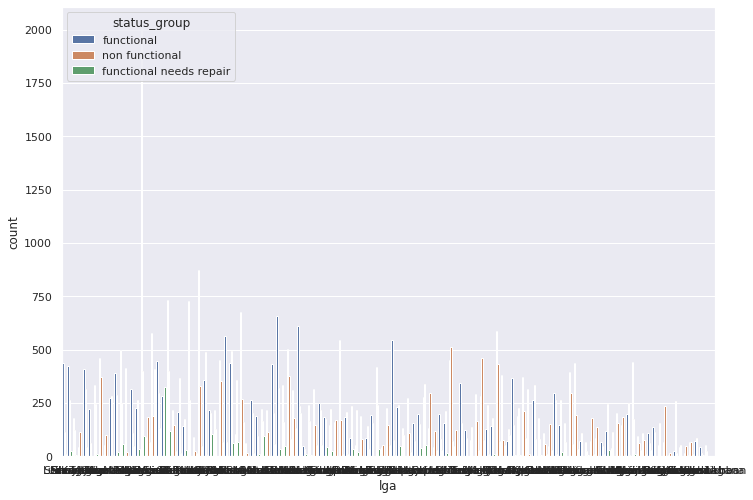

In [522]:
count_plot(wd, 'lga','status_group')

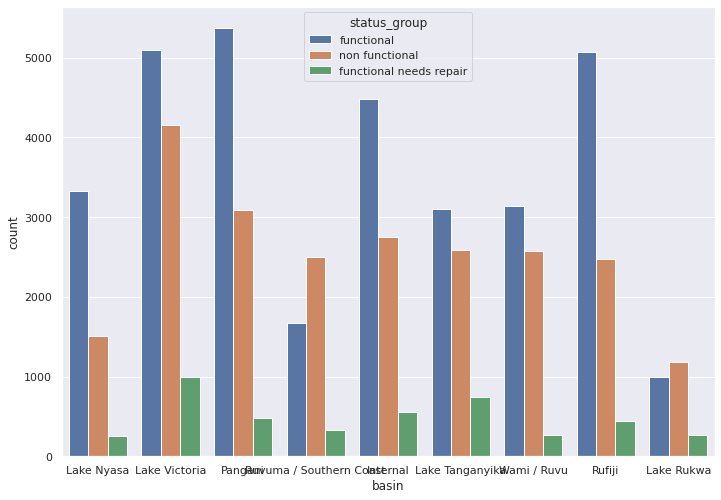

In [523]:
count_plot(wd, 'basin','status_group')

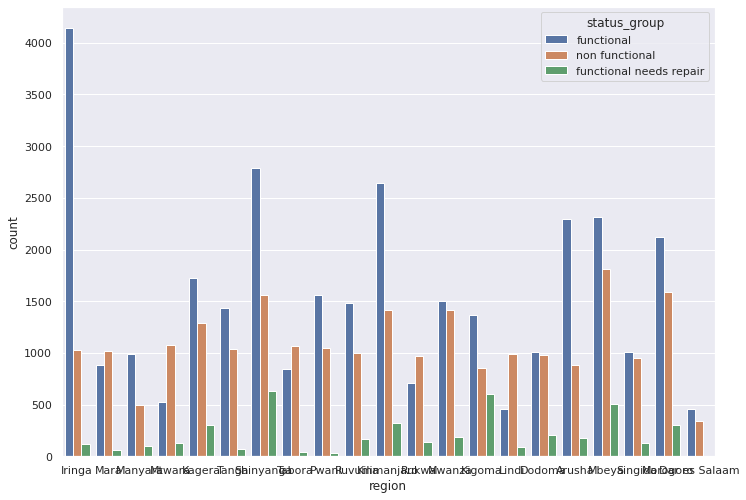

In [524]:
count_plot(wd, 'region','status_group')

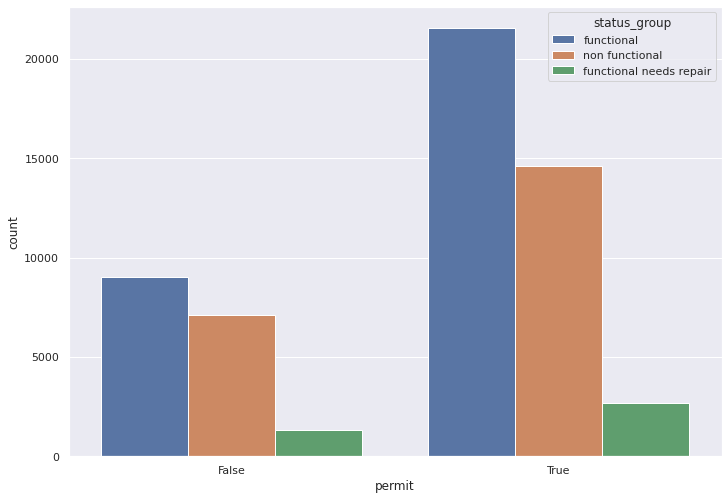

In [525]:
count_plot(wd, 'permit','status_group')

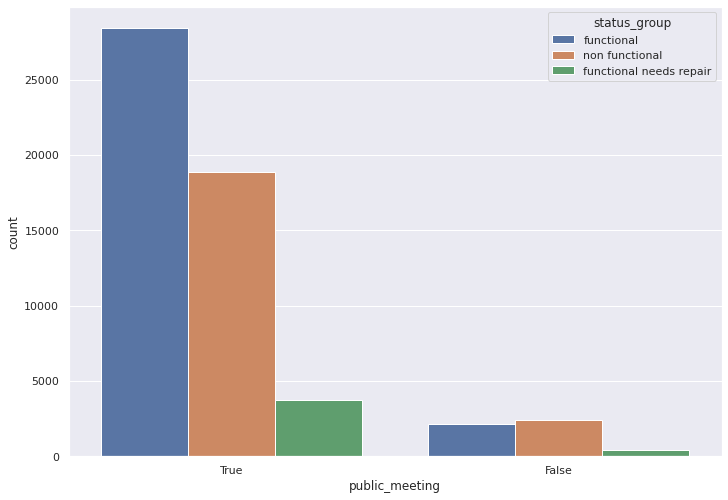

In [526]:
count_plot(wd, 'public_meeting','status_group')

## functions

In [527]:
def get_encoded_labels(y):
  encoded_y = pd.get_dummies(y['status_group'])
  return encoded_y

In [528]:
def get_factorized_features(x,x_test,feature_name):
  x[feature_name], index = x[feature_name].factorize()
  x_test[feature_name], index_test = x_test[feature_name].factorize()
  return x,x_test

In [529]:
def get_categorized_encoded_features(x,x_test,feature_name):
  x_new = pd.get_dummies(x[feature_name], prefix=feature_name)
  x_test_new = pd.get_dummies(x_test[feature_name], prefix=feature_name)
  x =x.drop([feature_name],axis=1)
  x = x.join(x_new)
  x_test =x_test.drop([feature_name],axis=1)
  x_test = x_test.join(x_test_new)
  return x,x_test

In [530]:
def get_new_dataframe(x,x_test, factorized_features_list, categorized_features_list):
  x_temp = x
  x_test_temp = x_test
  for i in factorized_features_list:
    x_temp, x_test_temp = get_factorized_features(x_temp, x_test_temp, i)
  for j in categorized_features_list:
    x_temp, x_test_temp = get_categorized_encoded_features(x_temp, x_test_temp, j)
  return x_temp, x_test_temp

In [531]:
def get_duration(x,x_test):
  x_temp = x
  x_test_temp = x_test
  train_count = 0
  test_count = 0
  for i in x["construction_year"]:
    x_temp["construction_year"][train_count] = -i
    train_count+=1
  for j in x_test["construction_year"]:
    x_test_temp["construction_year"][test_count] = -j
    test_count+=1
  return x_temp, x_test_temp

In [532]:
def plot_x_and_y(x,y):
  plt.bar(x, y)
  plt.show()

In [533]:
def count_plot(dataframe,x , hue):
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  sns.countplot(data=dataframe,x=x,hue=hue)

In [534]:
def drop_unnecessary_features(training_features,test_features, drop_list):
  training_features_dropped = training_features.drop(drop_list, axis=1)
  test_features_dropped = test_features.drop(drop_list, axis=1)
  return training_features_dropped, test_features_dropped

In [535]:
def get_year(training_features,test_features):
  temp_training_features = training_features
  temp_test_features = test_features
  train_count = 0
  test_count = 0
  for i in training_features["date_recorded"]:
    temp_training_features["date_recorded"][train_count] = int(i[0:4])
    train_count+=1
  for j in test_features["date_recorded"]:
    temp_test_features["date_recorded"][test_count] = int(j[0:4])
    test_count+=1
  return temp_training_features, temp_test_features

In [536]:
# countries = []
# for i in range(len(training_features["longitude"])):
#   lon = training_features['longitude'][i]
#   lat = training_features['latitude'][i]
#   coordinates = str(lat)+", "+str(lon);
#   country = get_country(coordinates)
#   countries.append(country)

In [537]:
def get_country(coordinates):
  locator = Nominatim(user_agent="myGeocoder")
  location = locator.reverse(coordinates)
  try:
    return location.raw["address"]['country']
  except:
    return "unknown"
#coordinates = '53.480837, -2.244914'

In [538]:
def fix_missing_values_using_mean(x, feature_name):
  x_feature = x[feature_name]
  sorted_x = sorted(x_feature)
  zeros_count = sorted_x.count(0)
  first_index = sorted_x.index(0)
  without_zeros =[]
  if first_index == 0:
    without_zeros = sorted_x[zeros_count:]
  else:
    without_zeros = sorted_x[0:first_index]+sorted_x[first_index+zeros_count:]

  me = statistics.mean(without_zeros)
  rounded_mean = round(me)
  x_temp = x
  x_temp[feature_name].replace(0,rounded_mean,inplace=True)
  return x_temp
  


In [539]:
def get_label_encode(y):
  le = LabelEncoder()
  le.fit(y)
  y = le.transform(y)
  return y


## Missing Values

In [540]:
wd= fix_missing_values_using_mean(wd, 'amount_tsh')
wd= fix_missing_values_using_mean(wd, 'gps_height')
wd= fix_missing_values_using_mean(wd, 'population')
wd["construction_year"].replace(0,1950,inplace=True)

##test
test_features= fix_missing_values_using_mean(test_features, 'amount_tsh')
test_features= fix_missing_values_using_mean(test_features, 'gps_height')
test_features= fix_missing_values_using_mean(test_features, 'population')
test_features["construction_year"].replace(0,1950,inplace=True)


In [541]:
wd['public_meeting'].fillna(False, inplace=True)
wd['permit'].fillna(False, inplace=True)

test_features['public_meeting'].fillna(False, inplace=True)
test_features['permit'].fillna(False, inplace=True)

In [542]:
wd['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [543]:
wd['scheme_management'].fillna('Other', inplace=True)
wd['scheme_management'].replace('None','Other', inplace=True)

In [544]:
test_features['scheme_management'].value_counts()

VWC                 9124
WUG                 1290
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

In [545]:
test_features['scheme_management'].fillna('Other', inplace=True)

In [546]:
wd['installer'] = wd['installer'].apply(lambda x: "DWE" if x=="DWE" else "Government" if x=="Government" else "Other")
test_features['installer'] = test_features['installer'].apply(lambda x: "DWE" if x=="DWE" else "Government" if x=="Government" else "Other")

In [547]:
wd['funder'] = wd['funder'].apply(lambda x: "Government Of Tanzania" if x=="Government Of Tanzania" else "Other")
test_features['funder'] = test_features['funder'].apply(lambda x: "Government Of Tanzania" if x=="Government Of Tanzania" else "Other")

## Additional Features

In [548]:
wd, test_features = get_year(wd, test_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [549]:
wd['duration'] = wd['date_recorded'] -wd['construction_year']

In [550]:
test_features['duration'] = test_features['date_recorded'] -test_features['construction_year']

## Remove Unnecessary Features

In [551]:
wd, test_features = drop_unnecessary_features(wd, test_features,['id','num_private','source_type', 'source_class', 'payment_type', 'waterpoint_type_group', 'quantity_group', 'water_quality', 'extraction_type_group', 'extraction_type', 'scheme_name', 'wpt_name', 'recorded_by','region_code','subvillage','management', 'construction_year', 'date_recorded' ])

In [552]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   district_code          59400 non-null  int64  
 9   lga                    59400 non-null  object 
 10  ward                   59400 non-null  object 
 11  population             59400 non-null  int64  
 12  public_meeting         59400 non-null  bool   
 13  scheme_management      59400 non-null  object 
 14  permit                 59400 non-null  bool   
 15  ex

## Factorization

In [553]:
wd, test_features = get_new_dataframe(wd, test_features, ['region','lga','ward','scheme_management'],['management_group','funder','installer','public_meeting','permit', 'basin','extraction_type_class' , 'payment', 'quality_group' , 'quantity', 'source', 'waterpoint_type'])

In [554]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 74 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   amount_tsh                                   59400 non-null  float64
 1   gps_height                                   59400 non-null  int64  
 2   longitude                                    59400 non-null  float64
 3   latitude                                     59400 non-null  float64
 4   region                                       59400 non-null  int64  
 5   district_code                                59400 non-null  int64  
 6   lga                                          59400 non-null  int64  
 7   ward                                         59400 non-null  int64  
 8   population                                   59400 non-null  int64  
 9   scheme_management                            59400 non-null  int64  
 10

In [555]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 73 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   amount_tsh                                   14850 non-null  float64
 1   gps_height                                   14850 non-null  int64  
 2   longitude                                    14850 non-null  float64
 3   latitude                                     14850 non-null  float64
 4   region                                       14850 non-null  int64  
 5   district_code                                14850 non-null  int64  
 6   lga                                          14850 non-null  int64  
 7   ward                                         14850 non-null  int64  
 8   population                                   14850 non-null  int64  
 9   scheme_management                            14850 non-null  int64  
 10

In [556]:
le = LabelEncoder()
le.fit(training_labels['status_group'])

LabelEncoder()

In [557]:
y = le.transform(training_labels['status_group'])

In [558]:
Counter(y)

Counter({0: 32259, 1: 4317, 2: 22824})

In [559]:
Counter(training_labels['status_group'])

Counter({'functional': 32259,
         'functional needs repair': 4317,
         'non functional': 22824})

# Model

## Data preparation

In [560]:
labels = y
features = wd.drop(['status_group'], axis=1)
# test_features = test_features.drop(['funder_Government Of Tanzania', 'funder_Other'], axis=1)

In [561]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

## Basic Training

In [566]:
brf = RandomForestClassifier(max_depth=100, random_state=0)
brf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [567]:
basic_pred = brf.predict(x_test)
accuracy_score(y_test, basic_pred)

0.7969594939291909

In [568]:
basic_val_pred = brf.predict(test_features)
reversed_basic_val_pred = le.inverse_transform(basic_val_pred)

In [569]:
Counter(reversed_basic_val_pred)

Counter({'functional': 9518,
         'functional needs repair': 370,
         'non functional': 4962})

In [571]:
results = pd.DataFrame()
tt = pd.read_csv(test_features_path)
results["id"] = tt['id']
results["status_group"] = reversed_basic_val_pred
results.to_csv('output370.csv', index=False)

## Grid search

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100 ],
    'max_features': [8, 16],
    'min_samples_leaf': [5, 10],
    'min_samples_split': [8, 16],
    'n_estimators': [500, 1000],
}
num_folds = 3
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = num_folds, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train, y_train)
print (grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 128.7min finished


{'bootstrap': True, 'max_depth': 50, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 500}


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
grid_search.best_score_

0.8007154882154883

## X test prediction

In [ ]:
test_prediction = best_model.predict(x_test)

In [ ]:
accuracy_score(y_test, test_prediction)

0.811026936026936

## Prediction

In [ ]:
prediction = best_model.predict(test_features)

In [ ]:
prediction

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
pred_results = []
for i in prediction:
  if i == 0:
    pred_results.append('functional')
  elif i == 1:
    pred_results.append('functional needs repair')
  elif i == 2:
    pred_results.append('non functional')

In [ ]:
Counter(pred_results)

Counter({'functional': 9297,
         'functional needs repair': 12,
         'non functional': 5541})

In [ ]:
Counter(prediction)

Counter({0: 9297, 1: 12, 2: 5541})

## Save Results

In [ ]:
results = pd.DataFrame()
tt = pd.read_csv(test_features_path)
results["id"] = tt['id']
results["status_group"] = pred_results
results.to_csv('output_8110.csv', index=False)